In [1]:
#librerias
import pandas as pd
import numpy as np
"""graficas"""
import matplotlib.pyplot as plt
import seaborn as sns
"""datos faltantes"""
import missingno as msno
"""imputacion de datos"""
from sklearn.impute import SimpleImputer
"""codificar"""
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [3]:
"""importar db normal, DoS y Probe"""
df_normal = pd.read_csv('../../araData/normal_1.2.csv', low_memory=False)
df_dos = pd.read_csv('../../araData/dos_1.2.csv', low_memory=False)
df_probe = pd.read_csv('../../araData/probe_1.2.csv', low_memory=False)

## 1.4 Eliminacion por seleccion de caracteristicas

In [4]:
caracteristicas_eldir = ['StartTime', 'LastTime','SrcStartTime','DstStartTime','SrcLastTime',
'DstLastTime', 'Seq','Flgs','SrcAddr','DstAddr','Sport','sTos','dTos','sTtl','dTtl','PCRatio','TcpOpt']

In [5]:
""" eliminar atributos por seleccion """
df_normal.drop(columns=caracteristicas_eldir, axis=1, inplace=True)
df_dos.drop(columns=caracteristicas_eldir, axis=1, inplace=True)
df_probe.drop(columns=caracteristicas_eldir, axis=1, inplace=True)

In [6]:
"""caracteristicas con datos faltantes"""
faltantes=['SIntPkt','DIntPkt','SIntPktAct','DIntPktAct','SIntPktIdl','DIntPktIdl',
'SIntPktMax','SIntPktMin','DIntPktMax','DIntPktMin','SIPActMax'
,'SIPActMin','DIPActMax','DIPActMin','SIPIdlMax','SIPIdlMin','DIPIdlMax','DIPIdlMin'
,'SrcJitter','DstJitter','SrcJitAct','DstJitAct','SrcJitIdl','DstJitIdl']

In [7]:
""" eliminar atributos que contienen datos faltantes """
df_normal.drop(columns=faltantes, axis=1, inplace=True)
df_dos.drop(columns=faltantes, axis=1, inplace=True)
df_probe.drop(columns=faltantes, axis=1, inplace=True)

<AxesSubplot: >

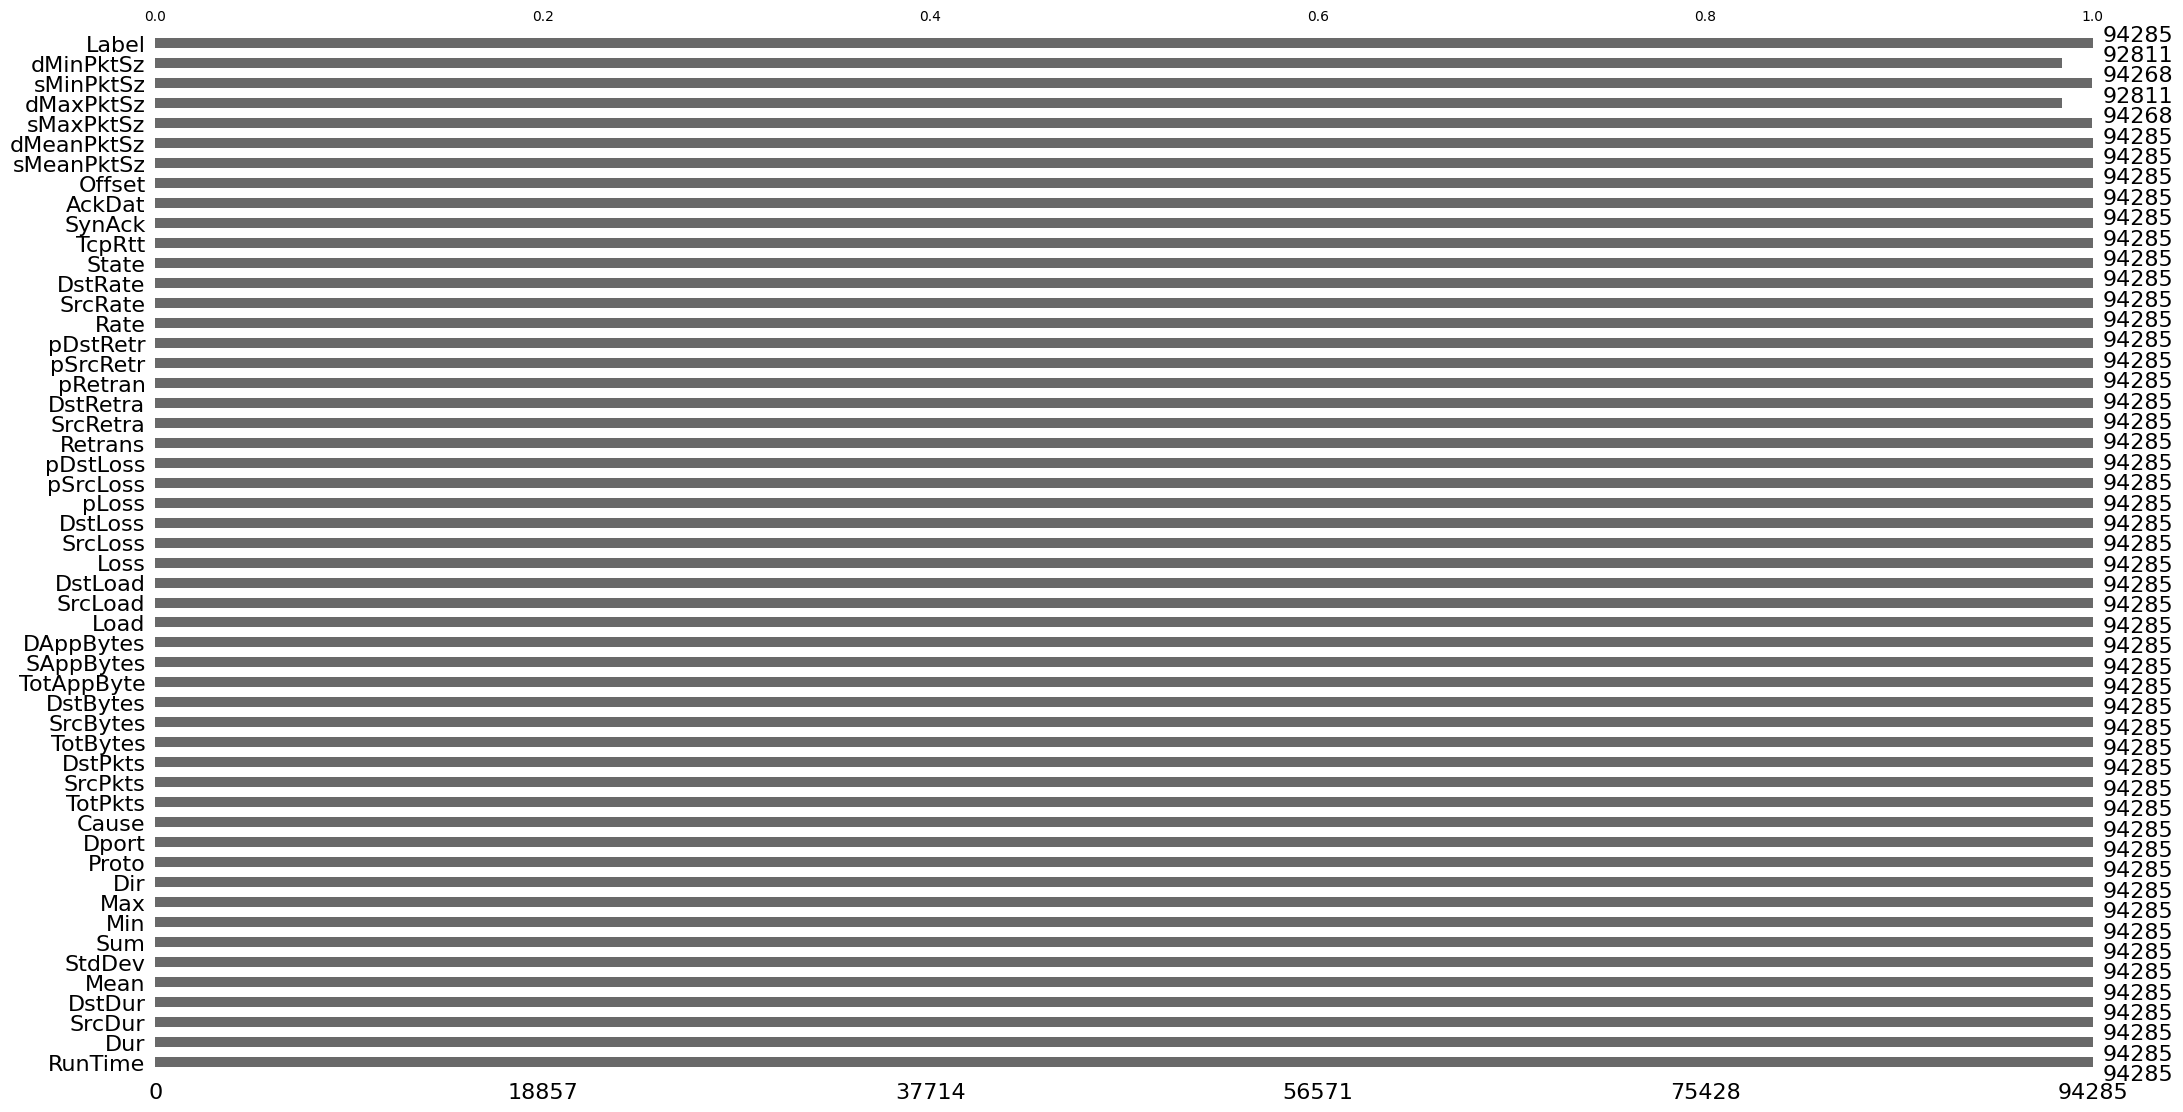

In [14]:
msno.bar(df_normal)

<AxesSubplot: >

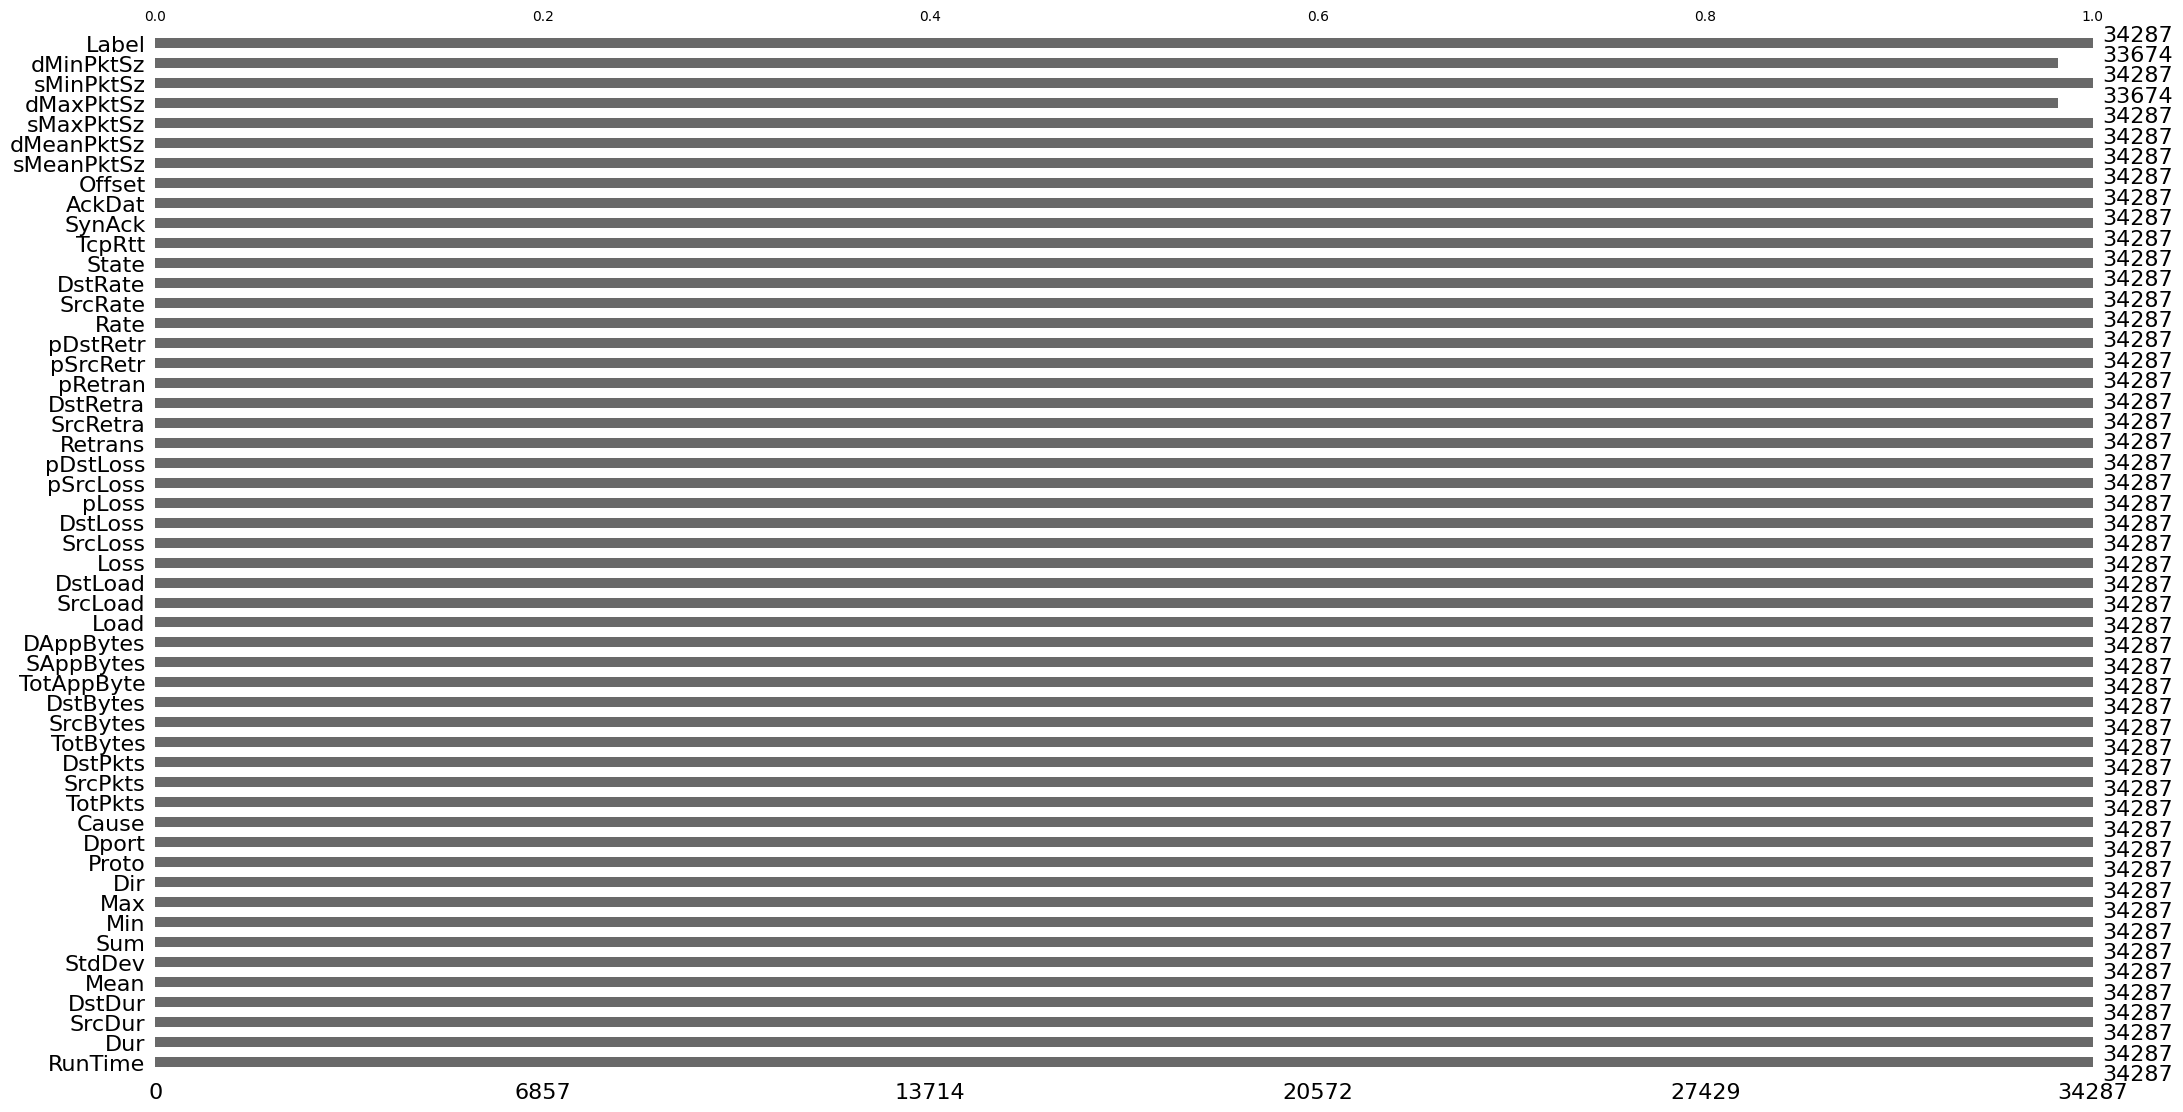

In [15]:
msno.bar(df_dos)

<AxesSubplot: >

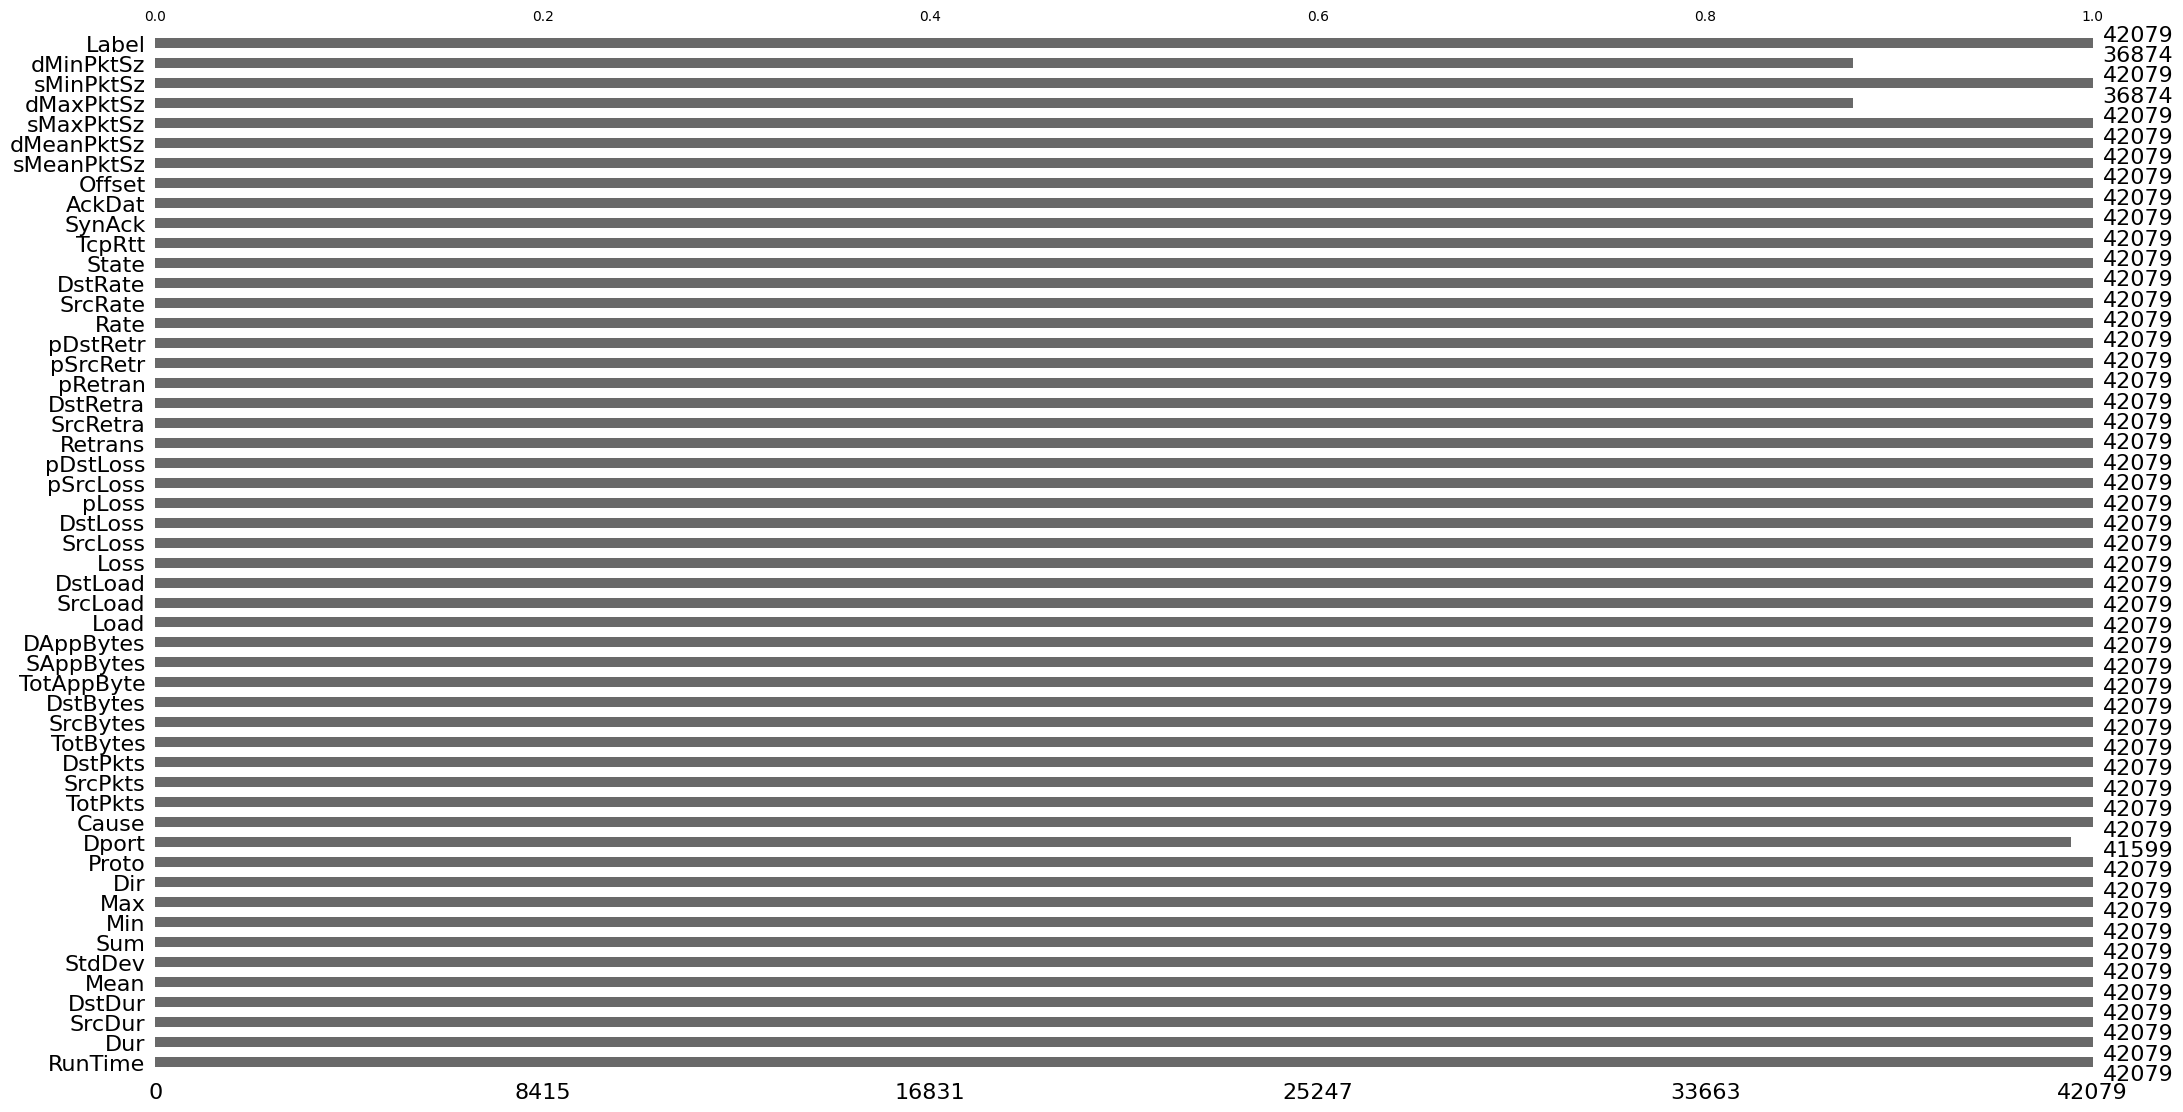

In [16]:
msno.bar(df_probe)

## 1.5 Tratamiento de valores faltantes

In [3]:
"""funcion para eliminar datos innecesarios"""
def eliminar_filasvaloresDesconocidos(_daframe:pd.DataFrame, _dfilasConsulta:pd.DataFrame):
    filas_eliminar=[]
    for index, fila in _dfilasConsulta.iterrows():
        filas_eliminar.append(index)
        """eliminar registros de filas almacenados """
    _daframe.drop(filas_eliminar, axis=0, inplace=True)

In [9]:
eliminar_filasvaloresDesconocidos(df_probe,df_probe[(df_probe.Proto=="unas")])

In [10]:
df_normal.isna().sum()

RunTime          0
Dur              0
SrcDur           0
DstDur           0
Mean             0
StdDev           0
Sum              0
Min              0
Max              0
Dir              0
Proto            0
Dport            0
Cause            0
TotPkts          0
SrcPkts          0
DstPkts          0
TotBytes         0
SrcBytes         0
DstBytes         0
TotAppByte       0
SAppBytes        0
DAppBytes        0
Load             0
SrcLoad          0
DstLoad          0
Loss             0
SrcLoss          0
DstLoss          0
pLoss            0
pSrcLoss         0
pDstLoss         0
Retrans          0
SrcRetra         0
DstRetra         0
pRetran          0
pSrcRetr         0
pDstRetr         0
Rate             0
SrcRate          0
DstRate          0
State            0
TcpRtt           0
SynAck           0
AckDat           0
Offset           0
sMeanPktSz       0
dMeanPktSz       0
sMaxPktSz       17
dMaxPktSz     1474
sMinPktSz       17
dMinPktSz     1474
Label            0
dtype: int64

In [12]:
df_dos.isna().sum()

RunTime         0
Dur             0
SrcDur          0
DstDur          0
Mean            0
StdDev          0
Sum             0
Min             0
Max             0
Dir             0
Proto           0
Dport           0
Cause           0
TotPkts         0
SrcPkts         0
DstPkts         0
TotBytes        0
SrcBytes        0
DstBytes        0
TotAppByte      0
SAppBytes       0
DAppBytes       0
Load            0
SrcLoad         0
DstLoad         0
Loss            0
SrcLoss         0
DstLoss         0
pLoss           0
pSrcLoss        0
pDstLoss        0
Retrans         0
SrcRetra        0
DstRetra        0
pRetran         0
pSrcRetr        0
pDstRetr        0
Rate            0
SrcRate         0
DstRate         0
State           0
TcpRtt          0
SynAck          0
AckDat          0
Offset          0
sMeanPktSz      0
dMeanPktSz      0
sMaxPktSz       0
dMaxPktSz     613
sMinPktSz       0
dMinPktSz     613
Label           0
dtype: int64

In [11]:
df_probe.isna().sum()

RunTime          0
Dur              0
SrcDur           0
DstDur           0
Mean             0
StdDev           0
Sum              0
Min              0
Max              0
Dir              0
Proto            0
Dport            0
Cause            0
TotPkts          0
SrcPkts          0
DstPkts          0
TotBytes         0
SrcBytes         0
DstBytes         0
TotAppByte       0
SAppBytes        0
DAppBytes        0
Load             0
SrcLoad          0
DstLoad          0
Loss             0
SrcLoss          0
DstLoss          0
pLoss            0
pSrcLoss         0
pDstLoss         0
Retrans          0
SrcRetra         0
DstRetra         0
pRetran          0
pSrcRetr         0
pDstRetr         0
Rate             0
SrcRate          0
DstRate          0
State            0
TcpRtt           0
SynAck           0
AckDat           0
Offset           0
sMeanPktSz       0
dMeanPktSz       0
sMaxPktSz        0
dMaxPktSz     4725
sMinPktSz        0
dMinPktSz     4725
Label            0
dtype: int64

In [13]:
"""Imputacion de datos"""
im_sd_maxminpktz=SimpleImputer(missing_values=np.nan, strategy="constant", fill_value=0.0)
im_sd_maxminpktz=im_sd_maxminpktz.fit(df_normal[['sMaxPktSz']])
df_normal['sMaxPktSz'] = im_sd_maxminpktz.transform(df_normal[['sMaxPktSz']])

im_sd_maxminpktz=im_sd_maxminpktz.fit(df_normal[['sMinPktSz']])
df_normal['sMinPktSz'] = im_sd_maxminpktz.transform(df_normal[['sMinPktSz']])

im_sd_maxminpktz=im_sd_maxminpktz.fit(df_normal[['dMaxPktSz']])
df_normal['dMaxPktSz'] = im_sd_maxminpktz.transform(df_normal[['dMaxPktSz']])

im_sd_maxminpktz=im_sd_maxminpktz.fit(df_normal[['dMinPktSz']])
df_normal['dMinPktSz'] = im_sd_maxminpktz.transform(df_normal[['dMinPktSz']])

im_sd_maxminpktz=im_sd_maxminpktz.fit(df_probe[['dMaxPktSz']])
df_probe['dMaxPktSz'] = im_sd_maxminpktz.transform(df_probe[['dMaxPktSz']])

im_sd_maxminpktz=im_sd_maxminpktz.fit(df_probe[['dMinPktSz']])
df_probe['dMinPktSz'] = im_sd_maxminpktz.transform(df_probe[['dMinPktSz']])

im_sd_maxminpktz=im_sd_maxminpktz.fit(df_dos[['dMaxPktSz']])
df_dos['dMaxPktSz'] = im_sd_maxminpktz.transform(df_dos[['dMaxPktSz']])

im_sd_maxminpktz=im_sd_maxminpktz.fit(df_dos[['dMinPktSz']])
df_dos['dMinPktSz'] = im_sd_maxminpktz.transform(df_dos[['dMinPktSz']])

In [18]:
"""cantidad de registros"""
print(df_normal.shape,'\n',df_dos.shape,'\n',df_probe.shape)

(94285, 52) 
 (34287, 52) 
 (41599, 52)


In [19]:
"""guardar estados de datos"""
df_normal.to_csv('../../araData/Z/normal_eda1.5.csv',index=False)
df_dos.to_csv('../../araData/Z/dos_eda1.5.csv',index=False)
df_probe.to_csv('../../araData/Z/probe_eda1.5.csv',index=False)

## 1.6 Valores atipicos (parte 2)

Anteriormente se trataron los valores atipicos en el atributo Dur, eliminandos registros con duracion total 0.0s

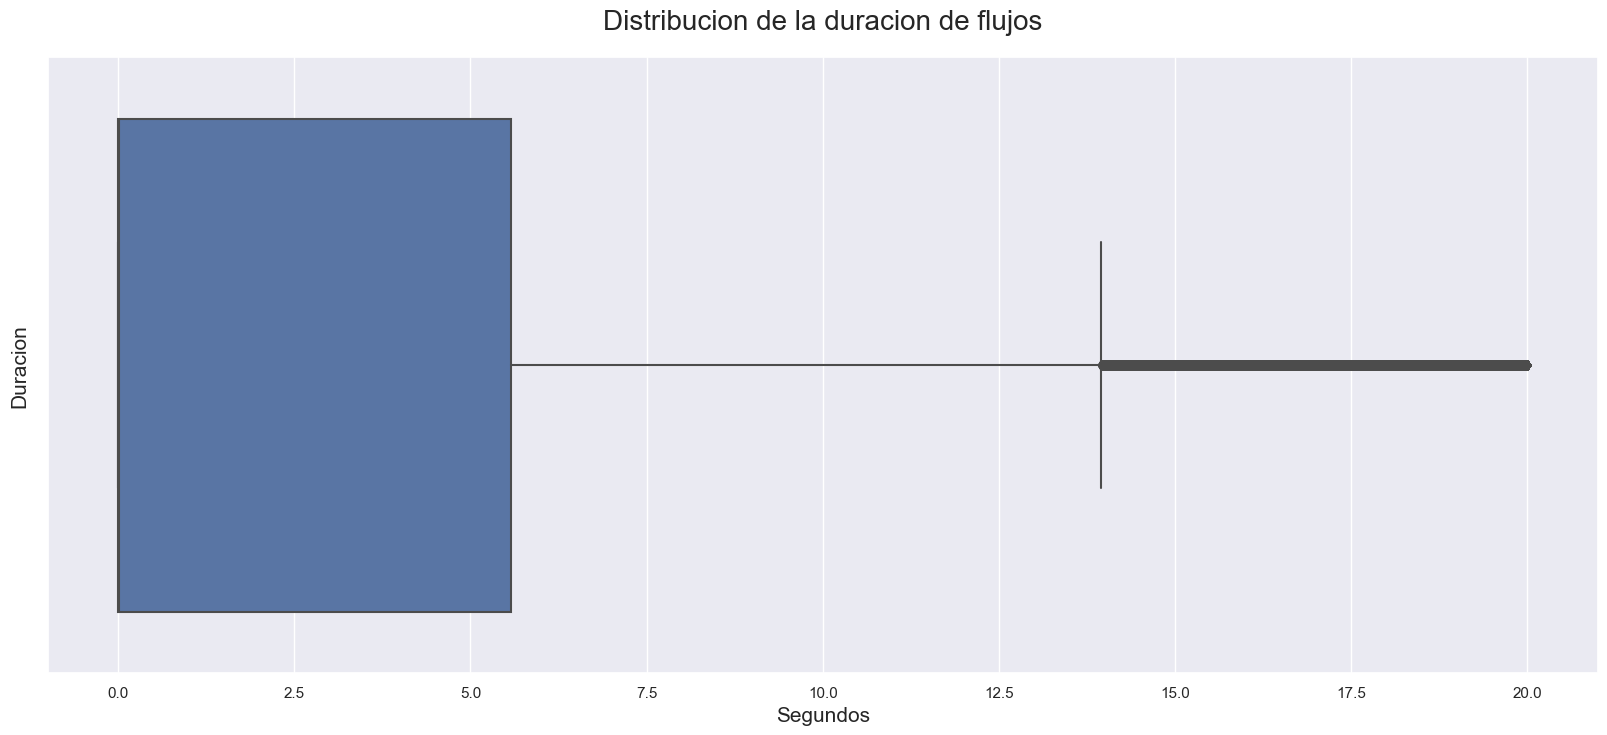

In [74]:
"""crear boxplot"""
ax = sns.boxplot(x = df_normal["Dur"])
ax.set_xlabel("Segundos", fontsize = 15)
ax.set_ylabel("Duracion", fontsize = 15)
ax.set_title("Distribucion de la duracion de flujos", fontsize =20, pad = 20)
plt.show()

In [107]:
maxumbral_normal = df_normal.Dur.quantile(0.95)
minumbral_normal = df_normal.Dur.quantile(0.05)
print("Valor maximo: %s  \nValor minimo: %s" % (maxumbral_normal, minumbral_normal))
normal_minumbral=df_normal[df_normal.Dur<minumbral_normal].count()
print("Registros: %s" %normal_minumbral[0])

Valor maximo: 19.084063000000004  
Valor minimo: 0.002582
Registros: 4703


In [108]:
df_normal[df_normal.Dur<minumbral_normal]

,RunTime,Dur,SrcDur,DstDur,Mean,StdDev,Sum,Min,Max,Dir,...,SynAck,AckDat,Offset,sMeanPktSz,dMeanPktSz,sMaxPktSz,dMaxPktSz,sMinPktSz,dMinPktSz,Label
134,0.002332,0.002332,0.0,0.0,0.002332,0.0,0.002332,0.002332,0.002332,<->,...,0.000000,0.000000,35856,71.0,454.0,71.0,454.0,71.0,454.0,Normal
178,0.002389,0.002389,0.0,0.0,0.002389,0.0,0.002389,0.002389,0.002389,<->,...,0.000000,0.000000,45100,76.0,364.0,76.0,364.0,76.0,364.0,Normal
191,0.002487,0.002487,0.0,0.0,0.002487,0.0,0.002487,0.002487,0.002487,<->,...,0.000000,0.000000,47376,75.0,421.0,75.0,421.0,75.0,421.0,Normal
192,0.002542,0.002542,0.0,0.0,0.002542,0.0,0.002542,0.002542,0.002542,<->,...,0.000000,0.000000,47508,75.0,385.0,75.0,385.0,75.0,385.0,Normal
200,0.002358,0.002358,0.0,0.0,0.002358,0.0,0.002358,0.002358,0.002358,<->,...,0.000000,0.000000,49144,76.0,364.0,76.0,364.0,76.0,364.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94188,0.002506,0.002506,0.0,0.0,0.002506,0.0,0.002506,0.002506,0.002506,<->,...,0.000000,0.000000,888040,82.0,311.0,82.0,311.0,82.0,311.0,Normal
94189,0.002557,0.002557,0.0,0.0,0.002557,0.0,0.002557,0.002557,0.002557,<->,...,0.000000,0.000000,888172,82.0,205.0,82.0,205.0,82.0,205.0,Normal
94196,0.001386,0.001386,0.0,0.0,0.001386,0.0,0.001386,0.001386,0.001386,->,...,0.029079,0.000068,889384,54.0,60.0,54.0,60.0,54.0,60.0,Normal
94217,0.000299,0.000299,0.0,0.0,0.000299,0.0,0.000299,0.000299,0.000299,<?>,...,0.000000,0.000000,1144,60.0,90.0,60.0,90.0,60.0,90.0,Normal


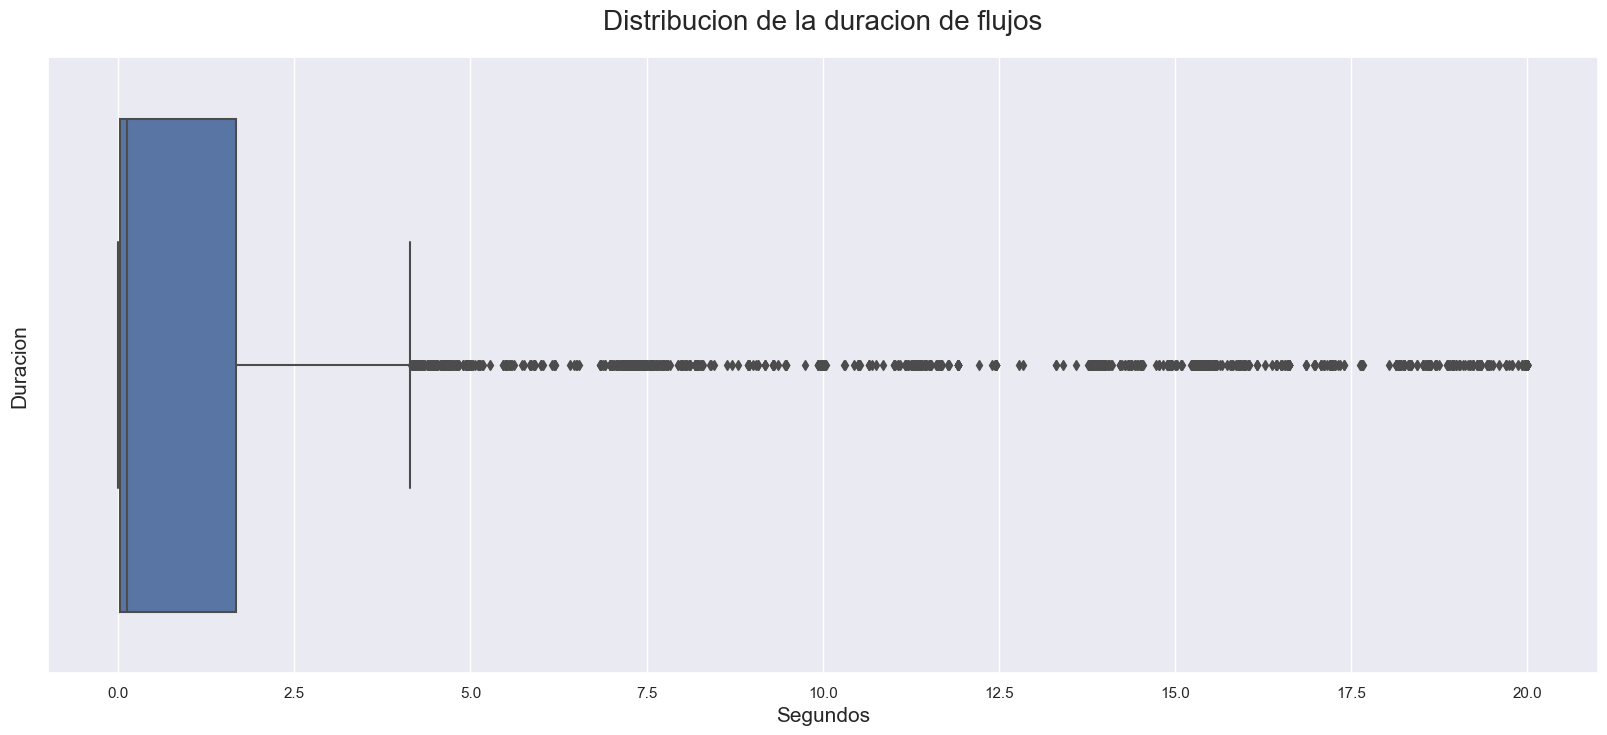

In [75]:
"""crear boxplot"""
ax = sns.boxplot(x = df_dos["Dur"])
ax.set_xlabel("Segundos", fontsize = 15)
ax.set_ylabel("Duracion", fontsize = 15)
ax.set_title("Distribucion de la duracion de flujos", fontsize =20, pad = 20)
plt.show()

In [109]:
maxumbral_dos = df_dos.Dur.quantile(0.95)
minumbral_dos = df_dos.Dur.quantile(0.05)
print("Valor maximo: %s  \nValor minimo: %s" % (maxumbral_dos, minumbral_dos))
dos_minumbral=df_dos[df_dos.Dur<minumbral_dos].count()
print("Registros: %s" %dos_minumbral[0])

Valor maximo: 3.9710462999999954  
Valor minimo: 0.0148863
Registros: 1715


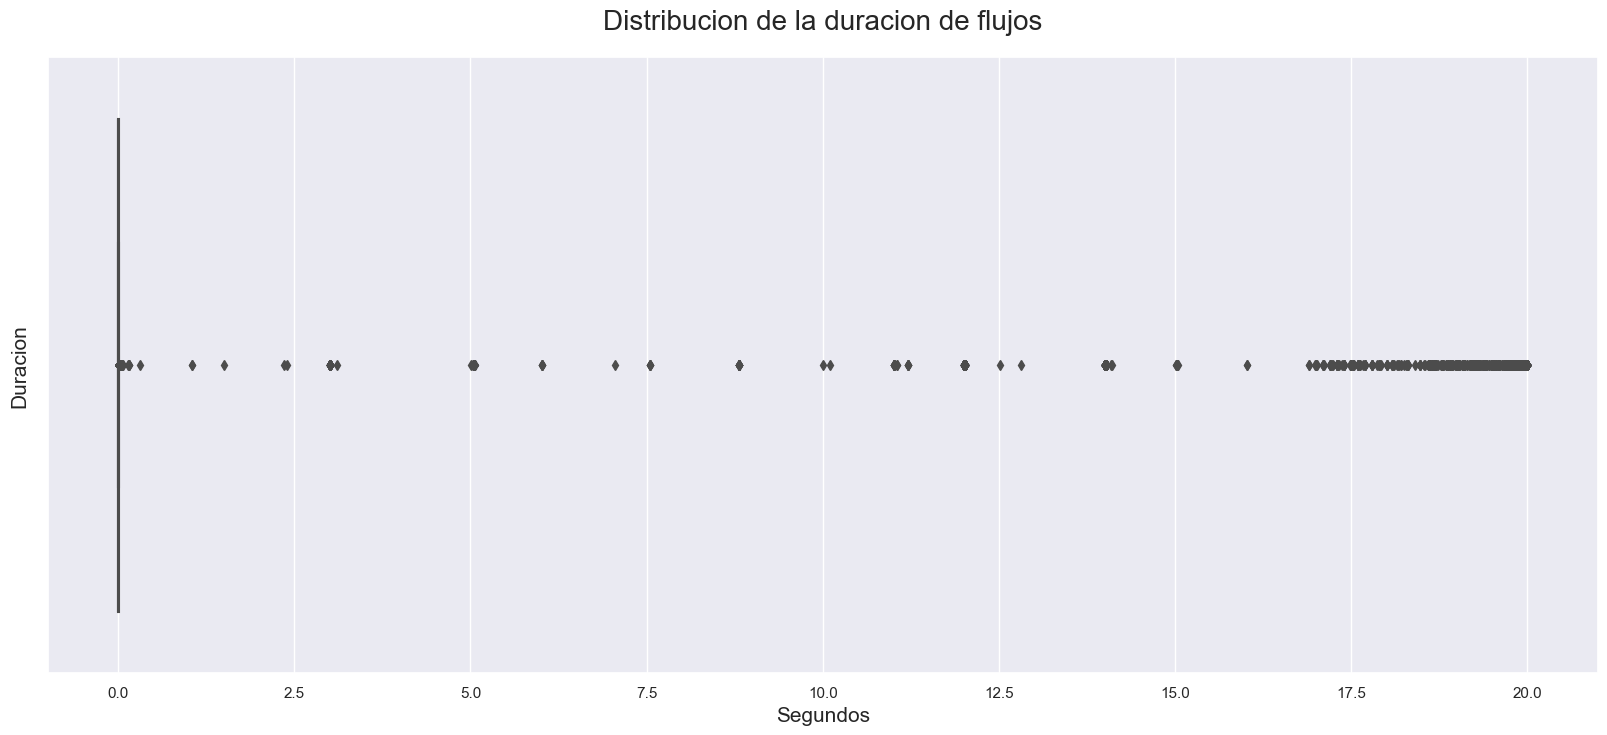

In [76]:
"""crear boxplot"""
ax = sns.boxplot(x = df_probe["Dur"])
ax.set_xlabel("Segundos", fontsize = 15)
ax.set_ylabel("Duracion", fontsize = 15)
ax.set_title("Distribucion de la duracion de flujos", fontsize =20, pad = 20)
plt.show()

In [111]:
maxumbral_probe = df_probe.Dur.quantile(0.90)
minumbral_probe = df_probe.Dur.quantile(0.10)
print("Valor maximo: %s  \nValor minimo: %s" % (maxumbral_probe, minumbral_probe))
probe_minumbral=df_probe[df_probe.Dur<minumbral_probe].count()
print("Registros: %s" %probe_minumbral[0])

Valor maximo: 0.007925200000000004  
Valor minimo: 0.0013458
Registros: 4160


## 1.7 Codificacion de etiquetas

Atributos no numericos: Dir(nominal), Proto(ordinal), Dport(ordinal), Cause(nominal)X, State(nominal)X, Label(ordinal)

Dir(nominal): existen flujos unidireccionales y bidireccionales.
Proto(ordinal): segun números de protocolo de Internet asignados.
Dport(ordinal): existe un rango de puertos.
Label(ordinal): clase 1,2,3,4

In [112]:
df_dos.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34287 entries, 0 to 34286
Data columns (total 52 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RunTime     34287 non-null  float64
 1   Dur         34287 non-null  float64
 2   SrcDur      34287 non-null  float64
 3   DstDur      34287 non-null  float64
 4   Mean        34287 non-null  float64
 5   StdDev      34287 non-null  float64
 6   Sum         34287 non-null  float64
 7   Min         34287 non-null  float64
 8   Max         34287 non-null  float64
 9   Dir         34287 non-null  object 
 10  Proto       34287 non-null  object 
 11  Dport       34287 non-null  object 
 12  Cause       34287 non-null  object 
 13  TotPkts     34287 non-null  int64  
 14  SrcPkts     34287 non-null  int64  
 15  DstPkts     34287 non-null  int64  
 16  TotBytes    34287 non-null  int64  
 17  SrcBytes    34287 non-null  int64  
 18  DstBytes    34287 non-null  int64  
 19  TotAppByte  34287 non-nul

In [4]:
"""se eliminan puertos extraños"""
eliminar_filasvaloresDesconocidos(df_probe, df_probe[(df_probe.Dport=="0x6bc0")|(df_probe.Dport=='x11-6')|(df_probe.Dport=='x11')|(df_probe.Dport=='x11-4')|(df_probe.Dport=='x11-2')|(df_probe.Dport=='x11-1')|(df_probe.Dport=='x11-7')|(df_probe.Dport=='x11-3')|(df_probe.Dport=='x11-5')|(df_probe.Dport=='0x0808')|(df_probe.Dport=='0x6400')|(df_probe.Dport=='0xeb29')|(df_probe.Dport=='0x58f4')|(df_probe.Dport=='0x3b7c')|(df_probe.Dport=='0xc734')|(df_probe.Dport=='0x49b6')|(df_probe.Dport=='0x9c4d')|(df_probe.Dport=='0x68b9')|(df_probe.Dport=='0x9b2c')|(df_probe.Dport=='0x140e')|(df_probe.Dport=='0x2449')|(df_probe.Dport=='0x436e')|(df_probe.Dport=='0x5def')|(df_probe.Dport== 
'0xeaad')|(df_probe.Dport=='0x5c05')|(df_probe.Dport=='0x08e9')|(df_probe.Dport=='0x50a2')|(df_probe.Dport=='0x7efc')|(df_probe.Dport=='0x43fb')|(df_probe.Dport=='0x1579')|(df_probe.Dport=='0x59ef')|(df_probe.Dport=='0xb78a')|(df_probe.Dport=='0xfc47')|(df_probe.Dport=='0xcf05')|(df_probe.Dport=='0x610d')|(df_probe.Dport=='0xd18a')|(df_probe.Dport=='0xd18a')|(df_probe.Dport=='0xe921')|(df_probe.Dport=='0xc851')|(df_probe.Dport=='0xd929')|(df_probe.Dport=='0x5964')|(df_probe.Dport=='0xa4fe')|(df_probe.Dport=='0x830d')|(df_probe.Dport=='0x9a22')|(df_probe.Dport=='0x2637')|(df_probe.Dport=='0xdc93')|(df_probe.Dport=='0x4bd9')|(df_probe.Dport=='0x8bab')|(df_probe.Dport=='0x4afc')|
(df_probe.Dport=='0xe98c')|(df_probe.Dport=='0x88a5')|(df_probe.Dport=='0x8dfa')|(df_probe.Dport=='0x65db')|(df_probe.Dport=='0xca0f')|(df_probe.Dport=='0x6b71')|(df_probe.Dport=='0x9110')|(df_probe.Dport=='0xcbe8')|(df_probe.Dport=='0xa8d4')|(df_probe.Dport=='0x544e')|(df_probe.Dport=='0x0608')|(df_probe.Dport=='0xaaf4')|(df_probe.Dport=='0x6e0e')|(df_probe.Dport=='0xaf96')|(df_probe.Dport=='0x1ecb')])

In [118]:
eliminar_filasvaloresDesconocidos(df_dos,df_dos[(df_dos.Dport=='0x5000')])

In [ ]:
"""cambio de atributos con datos categoricos (hasta aqui esta el 1.7)"""
df_normal.loc[:, df_normal.dtypes == 'object'] = df_normal.select_dtypes(['object']).apply(lambda x: x.astype('category'))
df_dos.loc[:, df_dos.dtypes == 'object'] = df_dos.select_dtypes(['object']).apply(lambda x: x.astype('category'))
df_probe.loc[:, df_probe.dtypes == 'object'] = df_probe.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [121]:
df_normal.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94285 entries, 0 to 94284
Data columns (total 52 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   RunTime     94285 non-null  float64 
 1   Dur         94285 non-null  float64 
 2   SrcDur      94285 non-null  float64 
 3   DstDur      94285 non-null  float64 
 4   Mean        94285 non-null  float64 
 5   StdDev      94285 non-null  float64 
 6   Sum         94285 non-null  float64 
 7   Min         94285 non-null  float64 
 8   Max         94285 non-null  float64 
 9   Dir         94285 non-null  category
 10  Proto       94285 non-null  category
 11  Dport       94285 non-null  category
 12  Cause       94285 non-null  category
 13  TotPkts     94285 non-null  int64   
 14  SrcPkts     94285 non-null  int64   
 15  DstPkts     94285 non-null  int64   
 16  TotBytes    94285 non-null  int64   
 17  SrcBytes    94285 non-null  int64   
 18  DstBytes    94285 non-null  int64   
 19  TotA

In [25]:
""" funcion para encontrar valores unicos de las caracteristicas """
def valores_unicos(_dataframe:pd.DataFrame,_caracteristicas:list):
    assert type(_dataframe)==pd.DataFrame, "Tipo de dato incorrecto"
    assert type(_caracteristicas)==list, "Tipo de dato incorrecto"
    """ recorrer lista de características """
    for i in _caracteristicas:
        """mostrar valores """
        display(i, _dataframe[i].unique())

In [26]:
"""lista de valores categoricos"""
no_numericos = ['Dir', 'Proto', 'Dport', 'Cause', 'State', 'Label'] 
valores_unicos(df_normal,no_numericos)

'Dir'

array(['  <?>', '  <->', '   ->'], dtype=object)

'Proto'

array(['tcp', 'udp'], dtype=object)

'Dport'

array([  443,    80,    53, 53592,  6653,  1900,   137,  5353,  5355,
         138, 22790, 57706,    22,  8612,  8610, 47008,    23, 53542,
       53576], dtype=int64)

'Cause'

array(['Start', 'Status'], dtype=object)

'State'

array(['CON', 'FIN', 'RST', 'INT', 'CLO', 'REQ'], dtype=object)

'Label'

array(['Normal'], dtype=object)

In [129]:
"""guardar estados de datos"""
df_normal.to_csv('../../araData/Z/normal_1.7sincategorizar.csv',index=False)
df_dos.to_csv('../../araData/Z/dos_1.7sincategorizar.csv',index=False)
df_probe.to_csv('../../araData/Z/probe_1.7sincategorizar.csv',index=False)

#### Codificacion de puertos

In [182]:
df_normal.Dport.replace({'https':443,'http':80,'domain':53,'netbios-ns':137,'mdns':5353,
'hostmon':5355 ,'netbios-dgm':138,'ssh':22,'telnet':23},inplace=True )

In [189]:
df_dos.Dport.replace({'http':80,'mdns':5353 ,'48312.0':48312,'6653.0':6653},inplace=True )

In [6]:
df_probe.Dport.replace({'domain':53, 'mysql':3306, 'http':80, 'https':443, 'discard':9, 'radius':1812, 'tacacs':49, 'ms-sql-s':1433, 'sip':5060, 'daytime':13, 
'snmp':161, 'afs3-fileserver':7000, 'svrloc':427, 'kpasswd':464, 'microsoft-ds':445, 'chargen':19, 'ms-sql-m':1434, 'netbios-ssn':139,
'gnutella-svc':6346, 'kerberos':88, 'ldap':389, 'time':37, 'sunrpc':111, 'nfs':832, 'kshell':544, 'xmpp-client':5222, 'whois':63, 
'submissions':465, 'tproxy':3346, 'tcpmux':1, 'ftp-data':20, 'qotd':17, 'rsync':873, 'login':513, 'cisco-sccp':2000, 'rootd':1094, 
'proofd':1093, 'finger':79, 'afs3-callback':7001, 'snpp':444, 'font-service':7100, 'shell':514, 'afpovertcp':548, 'svn':3690, 'afs3-bos':7007, 
'kerberos-adm':749, 'socks':1080, 'ipp':631, 'nut':3493, 'postgresql':5432, 'bgp':179, 'radmin-port':4899, 'ldaps':636, 'cvspserver':2401, 'echo':7, 
'lotusnote':1352, 'sane-port':6566, 'telnets':992, 'bacula-sd':9103, 'afs3-kaserver':7004, 'gris':2135, 'xmpp-server':5269, 'afs3-prserver':7002, 
'exec':512, 'ftp':21, 'submission':587, 'pop3s':995, 'smux':199, 'ms-wbt-server':3389, 'smtp':25, 'ssh':22, 'auth':113, 'telnet':23, 'imaps':993, 
'pop3':110, 'rtsp':554, 'printer':515, 'epmap':135, 'bacula-fd':9102, 'ftps':990, 'iscsi-target':3260, 'nntp':119, 'git':9418, 'gsiftp':2811, 
'daap':3689, 'cmip-man':163, 'bacula-dir':9101, 'klogin':543, 'rmiregistry':1099, 'nntps':563, 'ingreslock':1524, 'gopher':70, 
'gsigatekeeper':2119, 'netbios-ns':137, 'ntp':123, 'l2f':1701, 'biff':512,'talk':517, 'radius-acct':1813, 'tftp':69, 'netbios-dgm':138, 
'sa-msg-port':1646, 'ipsec-nat-t':4500, 'route':520, 'syslog':514, 'snmp-trap':2697, 'gnutella-rtr':6347, 'mdns':5353, 'isakmp':500,
'ntalk':518, 'asf-rmcp':623, 'icpv2':3130, 'who':513, 'rmtcfg':1236, 'moira-update': 777, 'amandaidx': 10082, 'cfinger': 2003, 'ripd': 2602,
'isisd': 2608, 'ircd': 6667, 'iprop':2121, 'ospfd': 2604, 'enbd-cstatd': 5051, 'zope-ftp':8021, 'bgpd':2605, 'imap2': 143, 'http-alt':591, 
'ospfapi':8899, 'omniorb': 8088, 'poppassd':106, 'spamd': 783, 'sip-tls': 5061, 'hostmon': 5355, 'datametrics': 1645,
'route':520, 'rplay' : 5555, 'fsp': 21,'nrpe':5666, 'webmin':10000},inplace=True )

In [10]:
df_probe.Dport.replace({'zebra':346},inplace=True)

In [208]:
df_dos.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34285 entries, 0 to 34284
Data columns (total 52 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   RunTime     34285 non-null  float64 
 1   Dur         34285 non-null  float64 
 2   SrcDur      34285 non-null  float64 
 3   DstDur      34285 non-null  float64 
 4   Mean        34285 non-null  float64 
 5   StdDev      34285 non-null  float64 
 6   Sum         34285 non-null  float64 
 7   Min         34285 non-null  float64 
 8   Max         34285 non-null  float64 
 9   Dir         34285 non-null  category
 10  Proto       34285 non-null  category
 11  Dport       34285 non-null  int32   
 12  Cause       34285 non-null  category
 13  TotPkts     34285 non-null  int64   
 14  SrcPkts     34285 non-null  int64   
 15  DstPkts     34285 non-null  int64   
 16  TotBytes    34285 non-null  int64   
 17  SrcBytes    34285 non-null  int64   
 18  DstBytes    34285 non-null  int64   
 19  TotA

In [9]:
group=df_probe.groupby(["Proto","Dport"])
ports = group.size().reset_index(name='cantidad')

In [12]:
df_probe.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41061 entries, 0 to 41061
Data columns (total 52 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   RunTime     41061 non-null  float64 
 1   Dur         41061 non-null  float64 
 2   SrcDur      41061 non-null  float64 
 3   DstDur      41061 non-null  float64 
 4   Mean        41061 non-null  float64 
 5   StdDev      41061 non-null  float64 
 6   Sum         41061 non-null  float64 
 7   Min         41061 non-null  float64 
 8   Max         41061 non-null  float64 
 9   Dir         41061 non-null  category
 10  Proto       41061 non-null  category
 11  Dport       41061 non-null  int32   
 12  Cause       41061 non-null  category
 13  TotPkts     41061 non-null  int64   
 14  SrcPkts     41061 non-null  int64   
 15  DstPkts     41061 non-null  int64   
 16  TotBytes    41061 non-null  int64   
 17  SrcBytes    41061 non-null  int64   
 18  DstBytes    41061 non-null  int64   
 19  TotA

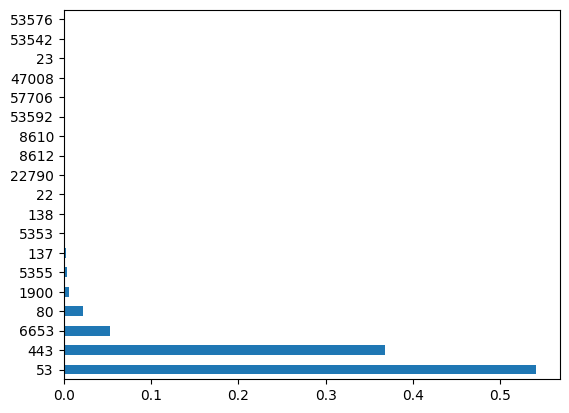

In [15]:
"""Porcentaje de puertos """
df_normal.Dport.value_counts(normalize=True)
df_normal.Dport.value_counts(normalize=True).plot.barh()
plt.show()

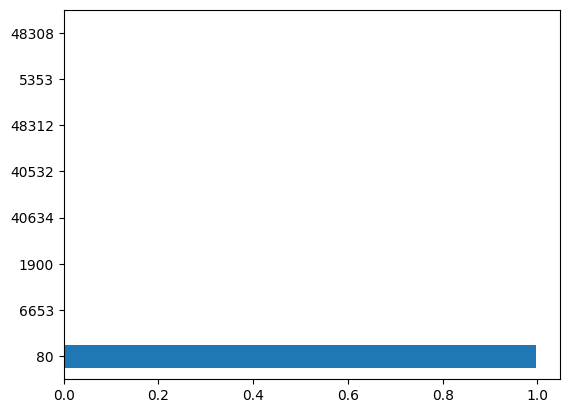

In [16]:
""" Porcentaje de puertos"""
df_dos.Dport.value_counts(normalize=True)
df_dos.Dport.value_counts(normalize=True).plot.barh()
plt.show()

C:\Users\miancastillo\AppData\Local\Temp\ipykernel_17560\1282496994.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  df_probe.Dport[0:1000].value_counts(normalize=True).plot.barh()


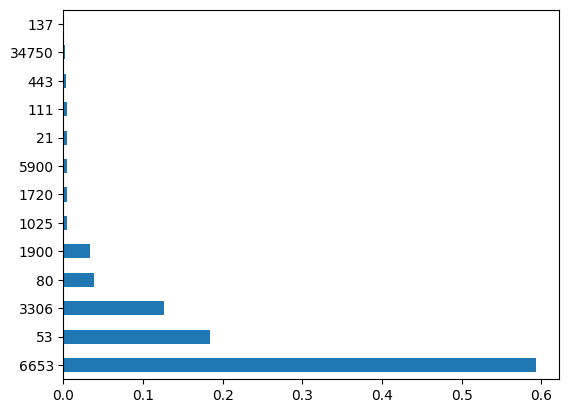

In [24]:
"""Graficar el porcentaje de flujos segun la direccion o sentido"""
df_probe.Dport.value_counts(normalize=True)
df_probe.Dport[0:1000].value_counts(normalize=True).plot.barh()
plt.show()

In [14]:
"""guardar estados de datos"""
df_normal.to_csv('../../araData/Z/normal_1.7_.csv',index=False)
df_dos.to_csv('../../araData/Z/dos_1.7_.csv',index=False)
df_probe.to_csv('../../araData/Z/probe_1.7_.csv',index=False)

#### Codificar protocolos

In [2]:
"""guardar estados de datos"""
df_normal = pd.read_csv('../../araData/Z/normal_1.7_.csv',low_memory=False)
df_dos = pd.read_csv('../../araData/Z/dos_1.7_.csv',low_memory=False)
df_probe = pd.read_csv('../../araData/Z/probe_1.7_.csv',low_memory=False)

In [3]:
df_normal.Proto.value_counts()

udp    52333
tcp    41952
Name: Proto, dtype: int64

In [6]:
df_dos.Proto.value_counts()

tcp    34178
udp      107
Name: Proto, dtype: int64

In [7]:
df_probe.Proto.value_counts()

tcp    36534
udp     4527
Name: Proto, dtype: int64

In [8]:
df_normal.State.unique()

['CON', 'FIN', 'RST', 'INT', 'CLO', 'REQ']
Categories (6, object): ['CLO', 'CON', 'FIN', 'INT', 'REQ', 'RST']

In [9]:
df_dos.State.unique()

['FIN', 'CON', 'REQ', 'RST', 'ACC', 'INT']
Categories (6, object): ['ACC', 'CON', 'FIN', 'INT', 'REQ', 'RST']

In [10]:
df_probe.State.unique()

['RST', 'FIN', 'INT', 'CON']
Categories (4, object): ['CON', 'FIN', 'INT', 'RST']

In [4]:
categorias = ['Cause','State']
df_normal.drop(categorias, axis="columns", inplace=True)
df_dos.drop(categorias, axis="columns", inplace=True)
df_probe.drop(categorias, axis="columns", inplace=True)

In [5]:
df_dos.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34285 entries, 0 to 34284
Data columns (total 50 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RunTime     34285 non-null  float64
 1   Dur         34285 non-null  float64
 2   SrcDur      34285 non-null  float64
 3   DstDur      34285 non-null  float64
 4   Mean        34285 non-null  float64
 5   StdDev      34285 non-null  float64
 6   Sum         34285 non-null  float64
 7   Min         34285 non-null  float64
 8   Max         34285 non-null  float64
 9   Dir         34285 non-null  object 
 10  Proto       34285 non-null  object 
 11  Dport       34285 non-null  int64  
 12  TotPkts     34285 non-null  int64  
 13  SrcPkts     34285 non-null  int64  
 14  DstPkts     34285 non-null  int64  
 15  TotBytes    34285 non-null  int64  
 16  SrcBytes    34285 non-null  int64  
 17  DstBytes    34285 non-null  int64  
 18  TotAppByte  34285 non-null  int64  
 19  SAppBytes   34285 non-nul

In [ ]:
"""guardar estados de datos"""
df_normal.to_csv('../../araData/Z/normal.csv',index=False)
df_dos.to_csv('../../araData/Z/dos.csv',index=False)
df_probe.to_csv('../../araData/Z/probe.csv',index=False)

Atributos no numericos: Dir(nominal), Proto(ordinal), Dport(ordinal), Cause(nominal)X, State(nominal)X, Label(ordinal)

In [5]:
"""concatenar datos"""
df_traffic = pd.concat([df_dos, df_normal, df_probe], axis=0)

In [6]:
df_traffic.Proto.value_counts()

tcp    112664
udp     56967
Name: Proto, dtype: int64

In [ ]:
df_traffic.loc[:, df_traffic.dtypes == 'object'] = df_traffic.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [8]:
df_traffic.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169631 entries, 0 to 41060
Data columns (total 50 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   RunTime     169631 non-null  float64 
 1   Dur         169631 non-null  float64 
 2   SrcDur      169631 non-null  float64 
 3   DstDur      169631 non-null  float64 
 4   Mean        169631 non-null  float64 
 5   StdDev      169631 non-null  float64 
 6   Sum         169631 non-null  float64 
 7   Min         169631 non-null  float64 
 8   Max         169631 non-null  float64 
 9   Dir         169631 non-null  category
 10  Proto       169631 non-null  category
 11  Dport       169631 non-null  int64   
 12  TotPkts     169631 non-null  int64   
 13  SrcPkts     169631 non-null  int64   
 14  DstPkts     169631 non-null  int64   
 15  TotBytes    169631 non-null  int64   
 16  SrcBytes    169631 non-null  int64   
 17  DstBytes    169631 non-null  int64   
 18  TotAppByte  169631 non-nu

In [9]:
df_total = pd.get_dummies(df_traffic, columns=['Dir','Proto'])

In [11]:
df_total.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169631 entries, 0 to 41060
Data columns (total 53 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   RunTime     169631 non-null  float64 
 1   Dur         169631 non-null  float64 
 2   SrcDur      169631 non-null  float64 
 3   DstDur      169631 non-null  float64 
 4   Mean        169631 non-null  float64 
 5   StdDev      169631 non-null  float64 
 6   Sum         169631 non-null  float64 
 7   Min         169631 non-null  float64 
 8   Max         169631 non-null  float64 
 9   Dport       169631 non-null  int64   
 10  TotPkts     169631 non-null  int64   
 11  SrcPkts     169631 non-null  int64   
 12  DstPkts     169631 non-null  int64   
 13  TotBytes    169631 non-null  int64   
 14  SrcBytes    169631 non-null  int64   
 15  DstBytes    169631 non-null  int64   
 16  TotAppByte  169631 non-null  int64   
 17  SAppBytes   169631 non-null  int64   
 18  DAppBytes   169631 non-nu

In [15]:
df_total.iloc[:,47]

0          Dos
1          Dos
2          Dos
3          Dos
4          Dos
         ...  
41056    Probe
41057    Probe
41058    Probe
41059    Probe
41060    Probe
Name: Label, Length: 169631, dtype: category
Categories (3, object): ['Dos', 'Normal', 'Probe']

In [16]:
"""CREAR ETIQUETAS NUMERICAS de variable dependiente"""
labelcode = LabelEncoder()
df_total['Label']= labelcode.fit_transform(df_total['Label'])

In [17]:
df_total.iloc[:,47]

0        0
1        0
2        0
3        0
4        0
        ..
41056    2
41057    2
41058    2
41059    2
41060    2
Name: Label, Length: 169631, dtype: int32

In [15]:
"""guardar estados de datos"""
df_total.to_csv('../../araData/Z/total_3_4.csv',index=False)

https://campus.datacamp.com/courses/dealing-with-missing-data-in-python/the-problem-with-missing-data?ex=1
https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4
https://medium.com/data-cleaning-dealing-with-outliers-using-data/data-cleaning-dealing-with-outliers-using-data-imputation-techniques-f2821ace2e8d
https://medium.com/@mishra.kamal/eda-and-feature-engg-series-handling-missing-values-7b610563ecc AQUI
https://maastrichtu-ids.github.io/intro/
https://towardsdatascience.com/exploratory-data-analysis-eda-python-87178e35b14
https://scikit-learn.org/stable/modules/outlier_detection.html
https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9187858
https://cyted.org/sites/default/files/sensors-22-03367.pdf
https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9908531
https://duckduckgo.com/?q=univariate+outlier&t=brave&ia=web
https://towardsdatascience.com/univariate-outlier-detection-in-python-40b621295bc5 ver
https://towardsdatascience.com/isolation-forest-auto-anomaly-detection-with-python-e7a8559d4562 ver
https://github.com/joanby/machinelearning-az/blob/master/datasets/Part%201%20-%20Data%20Preprocessing/Section%202%20--------------------%20Part%201%20-%20Data%20Preprocessing%20--------------------/categorical_data.ipynb
https://github.com/soyMA05/Machine-Learning-de-A-a-la-Z-R-y-Python-para-Data-Science/blob/main/Seccion2_Preprocesado_deDatos/30EscalarDatos_EstandarNormalizacion.ipynb
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html
https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-discretization
https://github.com/CyberJoel1/VelascoJoel_Proyecto_Final/blob/main/%5BNRC_8888%5D%20JoelVelasco_ProyectoFinal.ipynb
https://github.com/soyMA05/Mineria_TalleresLaboratorios ver escalados
https://www.geeksforgeeks.org/python-pandas-series-to_frame/ ver el to frame y variables dummy vleasco

In [ ]:
http://10.3.0.250:8892/
Network$$2012
http://192.188.58.82:3001/